In [ ]:
pip install pandas numpy seaborn matplotlib sklearn geopandas yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, k_means
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [ ]:
### Import data from csv file
data = pd.read_csv (r'/content/data.csv', sep=';', encoding='cp1252')   
print (data.shape)
data.tail()

(542, 15)


,daerah,lahan_2020,realisasi_belanja2020,kfd_category,kfd,anggaran_belanja2021,realiasasi_dak2021,penyerapan_hibah_2019,penyerapan_hibah_2020,realisasi_hibah_2020,alokasi_hibah_2021,A2021_MIN_A2020,ikp2021,ikp2020,ikp_growth
537,Kota Pematang Siantar,2092.0,1.113306e+09,2,0.704,9.933427e+09,245000000,0.00,0.00,0,0,0.0,79.63,78.70,0.93
538,Kota Sibolga,NaN,3.572279e+10,1,0.473,9.770757e+09,245000000,0.00,0.00,0,0,0.0,71.27,67.84,3.43
539,Kota Tanjung Balai,74.0,2.735021e+10,1,0.397,5.753328e+09,245000000,0.00,0.00,0,0,0.0,54.30,53.21,1.09
540,Kota Tebing 4,485.0,5.822189e+10,2,0.588,1.421100e+10,245000000,0.00,0.00,0,0,0.0,69.41,68.12,1.29
541,Provinsi Sumatera Utara,NaN,0.000000e+00,2,0.294,0.000000e+00,0,96.12,48.14,18870037351,7488570000,-80.9,72.25,71.84,0.41


Data Preprocessing : EDA & Data Cleaning

In [ ]:
data = data[data['alokasi_hibah_2021']!= 0]
print(data.head())

             daerah  lahan_2020  realisasi_belanja2020  kfd_category    kfd  \
2   Kab. Aceh Besar         NaN           2.000000e+16             3  0.986   
9   Kab. Aceh Timur         NaN           0.000000e+00             3  0.836   
10  Kab. Aceh Utara         NaN           1.130000e+16             3  1.015   
12     Kab. Bireuen         NaN           1.700000e+16             3  0.928   
23    Provinsi Aceh         NaN           1.220000e+17             2  0.303   

    anggaran_belanja2021  realiasasi_dak2021  penyerapan_hibah_2019  \
2           6.357995e+10          1767480500                  97.01   
9           0.000000e+00          1891704250                  76.53   
10          4.344327e+10          1831875000                   0.00   
12          3.707185e+10           332125000                  80.85   
23          2.570000e+16                   0                  35.50   

    penyerapan_hibah_2020  realisasi_hibah_2020  alokasi_hibah_2021  \
2                   97.37  

In [ ]:
# Getting rid of non numerical data
features = list(data.columns)[7:12]
num = data[features]
num_data =  num.loc[:, num.columns!='realisasi_hibah_2020']
print(num_data.head())
print(num_data.shape)

    penyerapan_hibah_2019  penyerapan_hibah_2020  alokasi_hibah_2021  \
2                   97.01                  97.37          8244352000   
9                   76.53                  51.97         11834328000   
10                   0.00                  31.30          4122896000   
12                  80.85                  94.98         16681474000   
23                  35.50                  92.24         11096797000   

    A2021_MIN_A2020  
2             -6.02  
9             34.15  
10           512.41  
12           171.06  
23             5.49  
(111, 4)


In [ ]:
# Checking for null values
data.isnull().sum()

daerah                    0
lahan_2020               46
realisasi_belanja2020     0
kfd_category              0
kfd                       0
anggaran_belanja2021      0
realiasasi_dak2021        0
penyerapan_hibah_2019     0
penyerapan_hibah_2020     0
realisasi_hibah_2020      0
alokasi_hibah_2021        0
A2021_MIN_A2020           0
ikp2021                   0
ikp2020                   0
ikp_growth                0
dtype: int64

In [ ]:
#Standardize data
ss = StandardScaler()
n_data = ss.fit_transform(num_data)
dataframe = pd.DataFrame(n_data, columns = num_data.columns)
print(dataframe.head())

   penyerapan_hibah_2019  penyerapan_hibah_2020  alokasi_hibah_2021  \
0               1.143940               1.265385           -0.280804   
1               0.531804              -0.225576            0.235138   
2              -1.755637              -0.904390           -0.873130   
3               0.660926               1.186896            0.931758   
4              -0.694561               1.096913            0.129142   

   A2021_MIN_A2020  
0        -0.513625  
1        -0.413401  
2         0.779857  
3        -0.071810  
4        -0.484907  


In [ ]:
data.describe()

,lahan_2020,realisasi_belanja2020,kfd_category,kfd,anggaran_belanja2021,realiasasi_dak2021,penyerapan_hibah_2019,penyerapan_hibah_2020,realisasi_hibah_2020,alokasi_hibah_2021,A2021_MIN_A2020,ikp2021,ikp2020,ikp_growth,clusters
count,65.000000,1.110000e+02,111.000000,111.000000,1.110000e+02,1.110000e+02,111.000000,111.000000,1.110000e+02,1.110000e+02,111.000000,111.000000,111.000000,111.000000,111.000000
mean,53620.061538,1.073965e+16,2.927928,0.968514,1.065794e+15,1.015223e+09,58.737658,58.838829,4.239220e+09,1.019821e+10,199.841712,78.560631,78.503874,0.056757,1.513514
std,46925.862266,1.822745e+16,1.203870,0.568554,5.142464e+15,1.059724e+09,33.608334,30.588255,4.608310e+09,6.989651e+09,402.619575,5.210987,5.015874,1.589463,1.656200
min,4034.000000,0.000000e+00,1.000000,0.294000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,1.139180e+09,-80.900000,61.740000,65.580000,-4.660000,0.000000
25%,19204.000000,0.000000e+00,2.000000,0.541000,1.613897e+09,2.800000e+08,37.280000,36.920000,7.971177e+08,6.118478e+09,-5.460000,75.700000,75.075000,-0.820000,0.000000
50%,36556.000000,3.010000e+15,3.000000,0.836000,3.087141e+10,8.178388e+08,66.830000,65.550000,2.756580e+09,8.279498e+09,74.750000,79.330000,79.500000,0.190000,1.000000
75%,74313.000000,1.560000e+16,4.000000,1.272500,4.488345e+10,1.453250e+09,89.245000,83.800000,5.890027e+09,1.195406e+10,215.295000,81.695000,82.240000,0.855000,3.000000
max,226182.000000,1.240000e+17,5.000000,2.652000,3.250000e+16,6.735289e+09,99.770000,100.000000,2.144959e+10,3.768875e+10,2494.740000,95.150000,88.250000,9.770000,4.000000


Checking for multicollinearity

In [ ]:
#title Default title text
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set 
X = dataframe[['penyerapan_hibah_2019', 'penyerapan_hibah_2020', 'alokasi_hibah_2021', 'A2021_MIN_A2020']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = dataframe.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                 feature       VIF
0  penyerapan_hibah_2019  1.817431
1  penyerapan_hibah_2020  1.855061
2     alokasi_hibah_2021  1.118942
3        A2021_MIN_A2020  1.109377


K-Means Clustering

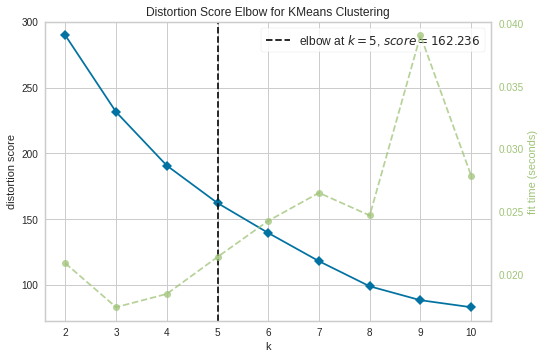

In [ ]:
# Using elbow method to find out the best number of clusters
model = KMeans(random_state=42)

elb_visualizer = KElbowVisualizer(model, k=(2,11))
elb_visualizer.fit(X)    
elb_visualizer.show()

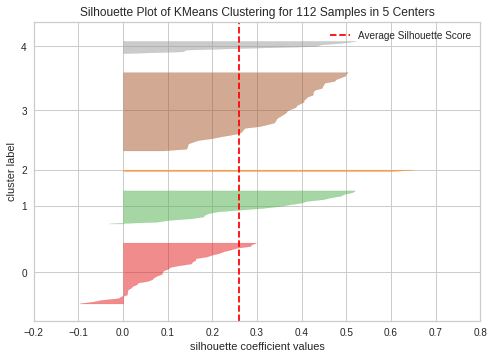

In [ ]:
# Using sillhouette method to find out the best number of clusters
model_4clust = KMeans(n_clusters = 5, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(X)    
sil_visualizer.show()

In [ ]:
# Running K-means Clustering into dataset
kmeans = KMeans(n_clusters = 5, init='k-means++', random_state=42)
data['clusters'] = kmeans.fit_predict(dataframe)

y = data['clusters']
print(data)

                      daerah  lahan_2020  realisasi_belanja2020  kfd_category  \
2            Kab. Aceh Besar         NaN           2.000000e+16             3   
9            Kab. Aceh Timur         NaN           0.000000e+00             3   
10           Kab. Aceh Utara         NaN           1.130000e+16             3   
12              Kab. Bireuen         NaN           1.700000e+16             3   
23             Provinsi Aceh         NaN           1.220000e+17             2   
..                       ...         ...                    ...           ...   
508              Kab. Asahan     10701.0           1.250000e+16             3   
512  Kab. Humbang Hasundutan     12772.0           8.030141e+10             1   
528          Kab. Simalungun     34685.0           9.796576e+10             4   
530     Kab. Tapanuli Tengah     12083.0           6.182533e+10             2   
541  Provinsi Sumatera Utara         NaN           0.000000e+00             2   

       kfd  anggaran_belanj

Run PCA on the data and reduce the dimensions in pca_num_components dimensions

In [ ]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(dataframe)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])


sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results, palette='cool')
plt.title('K-means Clustering with 2 dimensions using PCA')
plt.show()

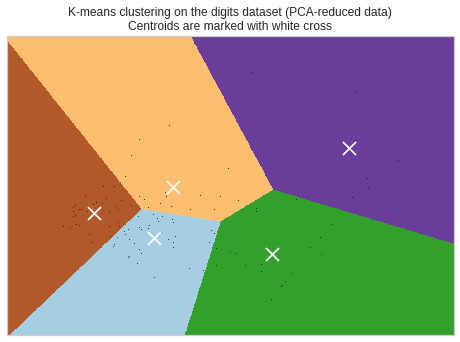

In [ ]:
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.01  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary and assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
#Parallel Coordinates Plot to Visualize Clustering Result
import plotly.graph_objects as go

fig = go.Figure(data =
    go.Parcoords(line = dict(color = data['clusters'], colorscale=["red", "orange", "blue", "magenta", "green"]),
        dimensions = list([
            #dict(range = [0,1], label = 'KFD',  values = data['kfd']),
            #dict(range = [0,326000000000], label = 'A_BD2021', values = data['anggaran_belanja2021']),
            #dict(range = [0,2300000000], label = 'RDAK2021', values = data['realiasasi_dak2021']),
            dict(range = [0,100], label = 'serap_Hibah19', values = data['penyerapan_hibah_2019']),
            dict(range = [0,100], label = 'serap_Hibah20', values = data['penyerapan_hibah_2020']),
            dict(range = [1139180000,37688754000],
                label = 'A_Hibah21', values = data['alokasi_hibah_2021']),
            dict(range = [-80,2500], label = 'A2021-A2020', values = data['A2021_MIN_A2020'])
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    font_size=18
)

fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



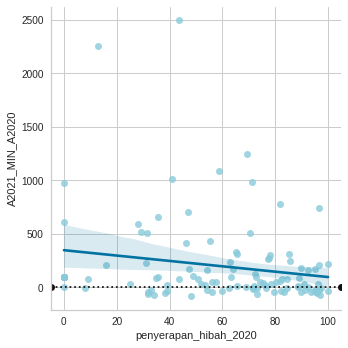

In [ ]:
g = sns.lmplot('penyerapan_hibah_2020', 'A2021_MIN_A2020', data=data,
               markers="o", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

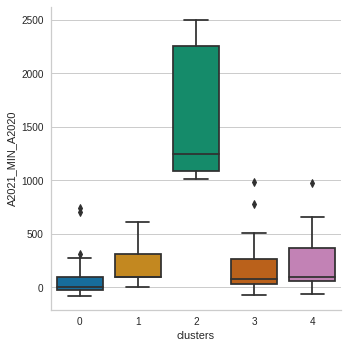

In [ ]:
sns.catplot(kind='box', data=data, 
            y='A2021_MIN_A2020', x='clusters', palette="colorblind", sharey=True)
plt.show()

In [ ]:
data.to_excel('cluster_skema2.xlsx', sheet_name='sheet1', index=True)